In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading in our dataset of news articles

import json

with open('food_articles.json') as f:
  data = json.load(f)

In [4]:
#d

headers = data[0].keys()
headers

dict_keys(['article_header', 'article_url', 'article_date_published', 'article_text', 'tags'])

In [5]:
df = pd.DataFrame.from_dict(data)

In [6]:
#tidying up the data by removing instances of closed brackets 

df['article_date_published'] = df['article_date_published'].str[0]
df['article_header'] = df['article_header'].str[0]
df['tags'] = df['tags'].str[0]
df.head()

,article_header,article_url,article_date_published,article_text,tags
0,Comfort with a twist trend prevalent at Winter...,https://www.foodbusinessnews.net/articles/2072...,02.21.2022,"CHICAGO — Dairy cheese, whether it comes from ...",Ingredient Applications
1,ADM identifies seven alternative protein trends,https://www.foodbusinessnews.net/articles/2064...,02.10.2022,CHICAGO — ADM has identified seven consumer tr...,Trends
2,Sizing up snacking trends,https://www.foodbusinessnews.net/articles/2052...,01.26.2022,CHICAGO — Consumers’ preference for snacking a...,Business
3,Targeting breakfast food for all morning occas...,https://www.foodbusinessnews.net/articles/2060...,02.04.2022,CHICAGO — Companies could increase breakfast p...,Trends
4,Webinar: Flavor trends to watch in 2022,https://www.foodbusinessnews.net/articles/2053...,01.26.2022,KANSAS CITY — What flavor trends are on tap fo...,Trends


In [7]:
#converting the article_date_published column to datetime

df['article_date_published'] =  pd.to_datetime(df['article_date_published'], infer_datetime_format=True)

In [8]:
# Finding instances of NaN values

df.isna().sum()

article_header            3
article_url               0
article_date_published    3
article_text              0
tags                      3
dtype: int64

In [9]:
df.tags.value_counts()

Trends                     674
Ingredient Applications    383
Food Products              368
Business                   353
Companies                  221
Operations                 131
Sales Channels             117
Ingredient Markets          31
Latest News                  4
Name: tags, dtype: int64

In [10]:
#article tag related to topics of the article 

df.tags.unique()

array(['Ingredient Applications', 'Trends', 'Business', 'Sales Channels',
       'Food Products', nan, 'Operations', 'Ingredient Markets',
       'Latest News', 'Companies'], dtype=object)

In [11]:
#examining the tag Operations

df[df["tags"]== 'Operations'].head()

,article_header,article_url,article_date_published,article_text,tags
83,Flowers exec says labor costs make automation ...,https://www.foodbusinessnews.net/articles/1899...,2021-06-30,"MARCO ISLAND, FLA. — Amid rising labor costs a...",Operations
464,Hemp’s marketing hopes and legal hurdles,https://www.foodbusinessnews.net/articles/1285...,2018-11-08,LAS VEGAS — Using hemp extracts as ingredients...,Operations
505,G.M.A. urges disclosure of refined ingredients...,https://www.foodbusinessnews.net/articles/1211...,2018-07-06,WASHINGTON — The Grocery Manufacturers Associa...,Operations
513,"Food safety, transparency of utmost importance...",https://www.foodbusinessnews.net/articles/1198...,2018-06-13,"NEW ORLEANS — Instore deli, bakery and prepare...",Operations
561,How food companies may gain trust and keep a '...,https://www.foodbusinessnews.net/articles/1119...,2018-01-29,"\nGLADSTONE, MO. — Consumers tend to hold food...",Operations


#### Business

In [12]:
# focusing on the following tags to account for correlation between tags


new_tags = ['Ingredient Applications', 'Trends', 'Business', 'Sales Channels',
       'Food Products', 'Operations' ]



In [14]:
df_business = df[df["tags"]=="Business"]
df_business.head()

,article_header,article_url,article_date_published,article_text,tags
2,Sizing up snacking trends,https://www.foodbusinessnews.net/articles/2052...,2022-01-26,CHICAGO — Consumers’ preference for snacking a...,Business
29,Robert Moskow rates Hostess Brands ‘outperform’,https://www.foodbusinessnews.net/articles/1984...,2021-10-19,NEW YORK – While many food companies are shift...,Business
35,ADM eyes eight emerging trends,https://www.foodbusinessnews.net/articles/1985...,2021-10-19,"CHICAGO — Plant-based lifestyles, clean and tr...",Business
37,Mondelez pledges net zero carbon emissions by ...,https://www.foodbusinessnews.net/articles/1995...,2021-11-02,"CHICAGO — Mondelez International, Inc. on Nov....",Business
39,Natural and organic sales approaching $300 bil...,https://www.foodbusinessnews.net/articles/1968...,2021-09-27,PHILADELPHIA — The natural products industry h...,Business


In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2284
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   article_header          2026 non-null   object        
 1   article_url             2026 non-null   object        
 2   article_date_published  2026 non-null   datetime64[ns]
 3   article_text            2026 non-null   object        
 4   tags                    2026 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.0+ KB


In [661]:
df['year'] = df['article_date_published'].dt.year

In [696]:
df.groupby('year')['article_text'].count().reset_index()

,year,article_text
0,2012,84
1,2013,309
2,2014,296
3,2015,312
4,2016,304
5,2017,157
6,2018,123
7,2019,146
8,2020,144
9,2021,131


<AxesSubplot:xlabel='year'>

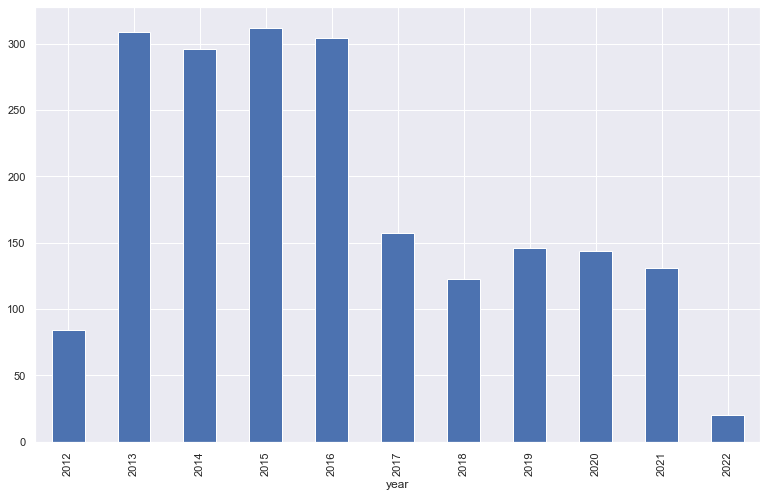

In [697]:
#count of articles published per year
df.groupby('year')['article_text'].count().plot(kind='bar')

#### WordCloud of tags

In [13]:
#lets visualize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

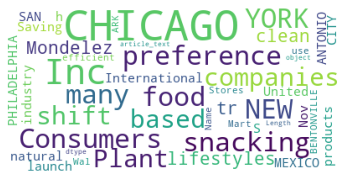

In [15]:
wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=100,max_font_size=50, random_state=42 ).generate(str(df_business.article_text))
                                          
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

#### Tidying up dataset

In [16]:
# filtering the data based on similar tags
df = df.loc[df['tags'].isin(new_tags)]

#removing instances of nan values
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2284
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   article_header          2026 non-null   object        
 1   article_url             2026 non-null   object        
 2   article_date_published  2026 non-null   datetime64[ns]
 3   article_text            2026 non-null   object        
 4   tags                    2026 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.0+ KB


In [19]:
#grouping our data by month

df_grouped_month = df.groupby(pd.Grouper(key='article_date_published', axis=0, 
                      freq='M')).sum()

In [21]:
df_grouped_quarterly.shape

(39, 4)

In [643]:
df_grouped_month.shape

(115, 4)

In [644]:
df_grouped_month[10:]

,article_header,article_url,article_text,tags
article_date_published,,,,
2013-06-30,H.H.S. and U.S.D.A. tap 2015 Dietary Guideline...,https://www.foodbusinessnews.net/articles/2429...,WASHINGTON — The U.S. Department of Health and...,OperationsBusinessTrendsOperationsBusinessFood...
2013-07-31,Innova: Superfruits continue to dominate bever...,https://www.foodbusinessnews.net/articles/2629...,"CHICAGO — Herbs, spices, honey, superfruits an...",Food ProductsFood ProductsIngredient Applicati...
2013-08-31,Progress on preschool obesityEighty per cent o...,https://www.foodbusinessnews.net/articles/2864...,WASHINGTON — In what appears to be an encourag...,TrendsBusinessIngredient ApplicationsSales Cha...
2013-09-30,Capturing new demographicsAnnie’s makes move t...,https://www.foodbusinessnews.net/articles/2934...,BOSTON — For natural and organic foods manufac...,Food ProductsBusinessIngredient ApplicationsIn...
2013-10-31,Flour boostingConsumers remain confused about ...,https://www.foodbusinessnews.net/articles/1128...,WASHINGTON — A gap exists between what consume...,Ingredient ApplicationsIngredient Applications...
...,...,...,...,...
2021-10-31,Tropical flavors provide ‘approachable adventu...,https://www.foodbusinessnews.net/articles/1948...,"KANSAS CITY — Fruit flavors, ranging from the ...",Ingredient ApplicationsTrendsTrendsFood Produc...
2021-11-30,Grupo Bimbo announces major new sustainability...,https://www.foodbusinessnews.net/articles/1994...,MEXICO CITY — Grupo Bimbo SAB de CV has announ...,TrendsBusinessTrendsTrendsTrendsIngredient App...
2021-12-31,"Environmental, social issues shape WGSN’s tren...",https://www.foodbusinessnews.net/articles/2017...,NEW YORK — From climate change to cultural inc...,TrendsTrendsTrendsTrendsSales ChannelsIngredie...


In [24]:
# selecting for a dataset

df_clean = df_grouped_month.copy()

### Text Pre-processing

In [25]:
# importing the necessary libraries

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import RegexpTokenizer

lem = WordNetLemmatizer()
stem = PorterStemmer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FaridSarwari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FaridSarwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FaridSarwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FaridSarwari\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
#stopwords :: list
stop_words = set(stopwords.words("english"))

#adding custom words - step added after freq1 is created
#stop_words = stop_words.union(freq1)

In [28]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
def preprocessing(text):
    #removing punctuation
    text = re.sub(' \S+[._]\S+ ',' ',text)
    re.sub('[^a-zA-Z]',' ',text)
    #convert to lower
    text = text.lower()
    #removing tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    #removing special characters and digits
    text = re.sub("(\\d|\\W)+"," ",text)
    #removing words that are less than 4 characters
    text = re.sub(r'\b\w{1,3}\b', '', text)
    
    #lemmatization
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(w) for w in text.split(" ") if not w in stop_words]
    text = " ".join(text)
    
    #stemming
    #stemmer=PorterStemmer()
    #tokens= word_tokenize(str(text))
    #text = [stemmer.stem(w) for w in tokens]
    #text = " ".join(text)
    return text 


In [31]:
df_clean["article_text_processed"] = df_clean.article_text.apply(lambda x: preprocessing(x)) 

In [32]:
df_clean.head()

,article_header,article_url,article_text,tags,article_text_processed
article_date_published,,,,,
2012-08-31,New global food paradigm advocatedCholesterol ...,https://www.foodbusinessnews.net/articles/129-...,ROME — A paradigm shift in favor of food biodi...,TrendsTrendsTrendsTrendsTrendsIngredient Appli...,rome paradigm shift favor food biodiversity...
2012-09-30,Review finds no evidence organic food is healt...,https://www.foodbusinessnews.net/articles/283-...,WASHINGTON — Four Corn Refiners Association me...,Ingredient ApplicationsOperationsFood Products...,washington four corn refiner association membe...
2012-10-31,Most quick-service consumers between 25 and 34...,https://www.foodbusinessnews.net/articles/432-...,CHICAGO — A typical quick-service restaurant c...,Sales ChannelsTrendsTrendsFood ProductsTrendsT...,chicago typical quick service restaurant cust...
2012-11-30,"Informed consumers to shape food, beverage tre...",https://www.foodbusinessnews.net/articles/590-...,"DUIVEN, THE NETHERLANDS — The influence of mor...",TrendsIngredient ApplicationsIngredient Applic...,duiven netherlands influence knowledgeable ...
2012-12-31,"Smaller, more frequent eating to top 2013 tren...",https://www.foodbusinessnews.net/articles/801-...,"OMAHA — Smaller, more frequent eating patterns...",TrendsIngredient ApplicationsIngredient Applic...,omaha smaller frequent eating pattern trend...


In [33]:
#identifying most common words

pd.Series(" ".join(df_clean["article_text_processed"]).split()).value_counts()[:10]

food          11458
said          10075
consumer       7537
product        7124
company        3588
year           3548
flavor         3496
ingredient     3377
also           2876
health         2506
dtype: int64

In [34]:
#identifying uncommon words

freq1 = pd.DataFrame(" ".join(df_clean['article_text_processed']).split()).value_counts().loc[lambda x: x>2]
freq1[-10:]

platter      3
sandy        3
extrusion    3
imitation    3
grappling    3
glutinous    3
rotten       3
rotting      3
pérez        3
rougette     3
dtype: int64

In [35]:
#stopwords :: list
stop_words = set(stopwords.words("english"))

#adding custom words
stop_words = stop_words.union(freq1)

In [36]:
# gensim for building our model

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

# only need tagger, no need for parser and named entity recognizer, for faster implementation

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [37]:
dataset = df_clean.article_text_processed.to_list()

In [38]:
# Build the bigram and trigrams

bigram = gensim.models.Phrases(dataset, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[dataset], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [39]:
def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words and len(word)>3] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [40]:
corpus = process_words(dataset)

In [236]:
#df_clean["processed_text"] = df_clean.article_text_processed.apply(lambda x: process_words(x)) 

In [140]:
#fetching corpus and vie corpus item
#corpus = df_clean.article_text_processed.to_list() #processed_text


### Data Exploration

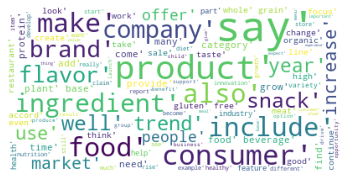

In [239]:
#lets visualize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [242]:
import string 
punct = set(string.punctuation)

#[' '.join( x for x in dataset if x not in punct)]


In [243]:
#dataset

### Text Preparation 1

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:

#instantiate CountVectorizer() 
cv = CountVectorizer(max_df=0.8,stop_words=stop_words,ngram_range=(1,1))  #max_df=0.8,stop_words=stop_words,ngram_range=(1,1)

# this steps generates word counts for the words in your docs
word_count_vector = cv.fit_transform(dataset)

In [45]:
cv.get_feature_names_out()

array(['aaa', 'aacc', 'aara', ..., 'zutell', 'éclair', 'ﬁtness'],
      dtype=object)

In [46]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [47]:
X2 = vectorizer2.fit_transform(dataset)

In [48]:
vectorizer2.get_feature_names_out()

array(['aaa found', 'aaa plus', 'aacc international', ..., 'éclair chou',
       'éclair coated', 'ﬁtness wellbeing'], dtype=object)

In [50]:
# gen a dataframe of list of words and their frequency in our corpus

word_freq = pd.DataFrame(list(cv.vocabulary_.items()), columns=["keyword", "freq"]).set_index('keyword')

In [51]:
# least frequently appearing words in the corpus 

word_freq.sort_values(by='freq', ascending=False)[ -20:]

,freq
keyword,
abel,19
abby,18
abbott,17
abbot,16
abating,15
abatement,14
abated,13
abate,12
abandoning,11


### Text Preparation 2

In [52]:
#creating a dictionary of all keywords


dictionary = corpora.Dictionary(corpus)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 15276


In [53]:
#Creating a term document frequency matrix - Change between dictionary 1/2

term_doc_freq = [dictionary.doc2bow(text) for text in corpus]

In [54]:
dict_corpus = {}

for i in range(len(term_doc_freq)):
  for idx, freq in term_doc_freq[i]:
    if dictionary[idx] in dict_corpus:
      dict_corpus[dictionary[idx]] += freq
    else:
       dict_corpus[dictionary[idx]] = freq

In [55]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [56]:
dict_df.sort_values(by='freq', ascending=False).iloc[-10:]

,freq
nielson,1
shaun,1
pollo,1
streak,1
ther,1
oreal,1
onerous,1
using,1
varying,1
cheekily,1


C:\Users\FaridSarwari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


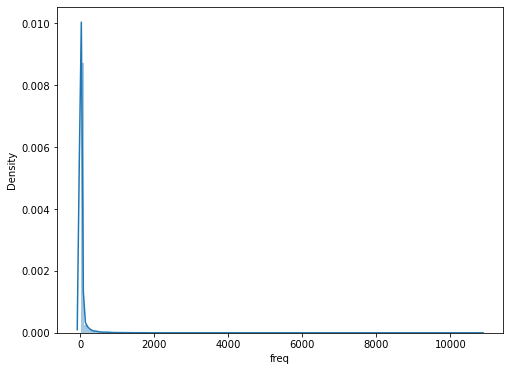

In [57]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [58]:
extension = dict_df[dict_df.freq<10].index.tolist()

In [59]:
ids = [dictionary.token2id[extension[i]] for i in range(len(extension))]


In [60]:
dictionary.filter_tokens(bad_ids=ids)

In [61]:
stop_words.update(extension)

In [62]:
data_ready = process_words(dataset)

In [63]:
# Create Dictionary
dictionary2 = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(dictionary2))

Total Vocabulary Size: 4790


### Visualizing most freq words

In [65]:
corpus = dataset

[Text(0, 0, 'food'),
 Text(1, 0, 'said'),
 Text(2, 0, 'consumer'),
 Text(3, 0, 'product'),
 Text(4, 0, 'company'),
 Text(5, 0, 'year'),
 Text(6, 0, 'flavor'),
 Text(7, 0, 'ingredient'),
 Text(8, 0, 'also'),
 Text(9, 0, 'health'),
 Text(10, 0, 'based'),
 Text(11, 0, 'beverage'),
 Text(12, 0, 'brand'),
 Text(13, 0, 'snack'),
 Text(14, 0, 'market'),
 Text(15, 0, 'trend'),
 Text(16, 0, 'protein'),
 Text(17, 0, 'according'),
 Text(18, 0, 'grain'),
 Text(19, 0, 'sale')]

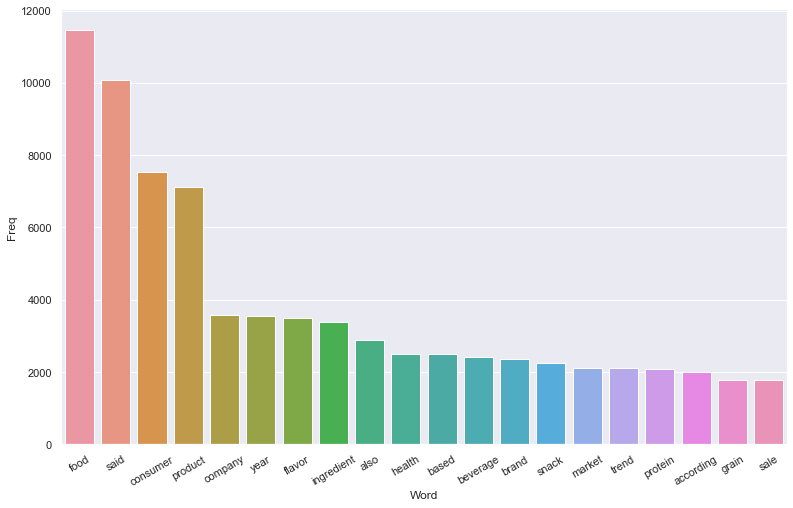

In [66]:
#unigram
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0       food beverage  1077
1         plant based  1052
2         gluten free   831
3         whole grain   797
4        united state   581
5      vice president   475
6     chief executive   423
7   executive officer   411
8         clean label   370
9           last year   361
10    health wellness   349
11       food service   346
12      packaged fact   296
13    fruit vegetable   287
14      food industry   274
15     specialty food   258
16          past year   248
17         based food   247
18      consumer said   247
19       food company   243


[Text(0, 0, 'food beverage'),
 Text(1, 0, 'plant based'),
 Text(2, 0, 'gluten free'),
 Text(3, 0, 'whole grain'),
 Text(4, 0, 'united state'),
 Text(5, 0, 'vice president'),
 Text(6, 0, 'chief executive'),
 Text(7, 0, 'executive officer'),
 Text(8, 0, 'clean label'),
 Text(9, 0, 'last year'),
 Text(10, 0, 'health wellness'),
 Text(11, 0, 'food service'),
 Text(12, 0, 'packaged fact'),
 Text(13, 0, 'fruit vegetable'),
 Text(14, 0, 'food industry'),
 Text(15, 0, 'specialty food'),
 Text(16, 0, 'past year'),
 Text(17, 0, 'based food'),
 Text(18, 0, 'consumer said'),
 Text(19, 0, 'food company')]

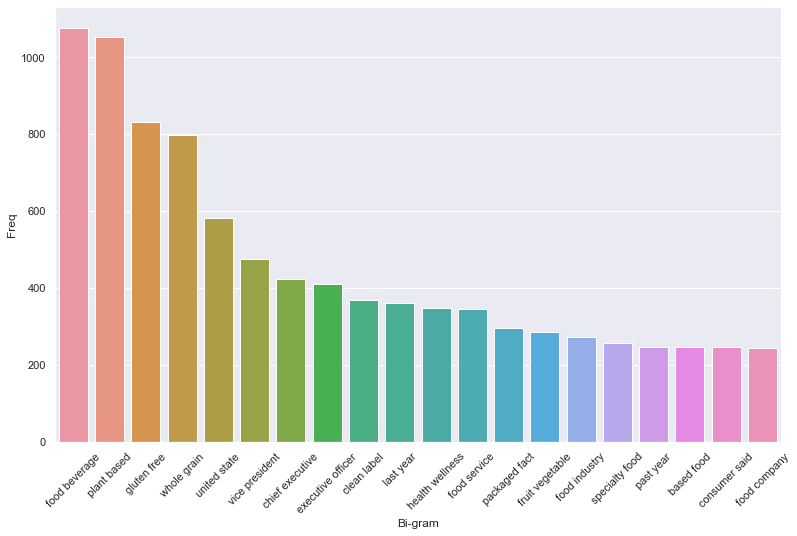

In [67]:
#bigram
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                       Tri-gram  Freq
0       chief executive officer   411
1              plant based food   150
2         food beverage product   150
3            food business news   145
4          market research firm   144
5     president chief executive   126
6      food drug administration   115
7          natural product expo   114
8         innova market insight   112
9           plant based protein   107
10        senior vice president   101
11       food beverage industry   101
12             plant based meat    99
13  institute food technologist    93
14           packaged fact said    88
15             gluten free food    88
16            whole food market    82
17     executive vice president    81
18          gluten free product    81
19              fancy food show    79


[Text(0, 0, 'chief executive officer'),
 Text(1, 0, 'plant based food'),
 Text(2, 0, 'food beverage product'),
 Text(3, 0, 'food business news'),
 Text(4, 0, 'market research firm'),
 Text(5, 0, 'president chief executive'),
 Text(6, 0, 'food drug administration'),
 Text(7, 0, 'natural product expo'),
 Text(8, 0, 'innova market insight'),
 Text(9, 0, 'plant based protein'),
 Text(10, 0, 'senior vice president'),
 Text(11, 0, 'food beverage industry'),
 Text(12, 0, 'plant based meat'),
 Text(13, 0, 'institute food technologist'),
 Text(14, 0, 'packaged fact said'),
 Text(15, 0, 'gluten free food'),
 Text(16, 0, 'whole food market'),
 Text(17, 0, 'executive vice president'),
 Text(18, 0, 'gluten free product'),
 Text(19, 0, 'fancy food show')]

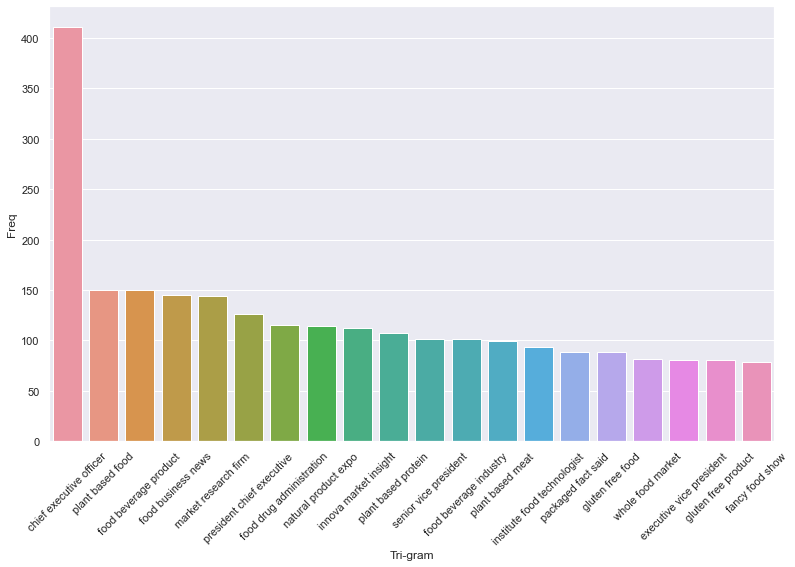

In [68]:
#trigram
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

### TF-IDF 

In [266]:
# importing the necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
from nltk.corpus import stopwords
from pathlib import Path  
import glob

In [267]:
dataset[0]

'rome  paradigm shift  favor  food biodiversity  away excessive dependence  crop staple  wheat corn  rice  urged    book published   food  agriculture organization   united nation  biodiversity international  book sustainable diet  biodiversity direction  solution  policy research  action  edited  barbara burlingame  sandro dernini  page book   compilation  paper presented  november   international scientific symposium titled biodiversity  sustainable diet united hunger organized jointly    biodiversity international like  group  based  rome  book criticizes  approach toward world hunger focused excessively  food quantity   pace  biodiversity loss  ecosystem degradation coupled emerging health issue related  diet make  urgent  address  quality  agriculture  food system  said poor diet  linked  marked increase   communicable disease  diabetes  cardio vascular disease across   noted  three largest grain staple corn wheat  rice account   caloric intake though  group fails  estimate whethe

In [284]:
#transform the tf idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(max_df=0.8, stop_words=stop_words,ngram_range=(1,1))  #max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                                                                                                #min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
X_train_tf_idf = tf_idf_vect.fit_transform(dataset)
terms = tf_idf_vect.get_feature_names()

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [285]:
# create a dataframe from a word matrix
def dtm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = df_clean.index
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
 
def idf2df(wm, feat_names):
  
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm, index=[0],
                      columns=feat_names)
    return(df)

In [286]:
df_tf_idf = dtm2df(X_train_tf_idf ,terms)

In [287]:
df_tf_idf

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.0,0.0,0.0,0.0,0.0,0.048764,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-09-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-11-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030987,0.0
2012-12-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2021-11-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2021-12-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


The above represents our TF-IDF martix. Below we take a deep dive into each of the steps involved:

1. Calculating Term Frequency: 
2. Calculating IDF of each term in the corpus
3. Creating a table by multiplying TF*IDF vectors


### Step 1: Calculate Term Frequency

In [ ]:
#instantiate CountVectorizer() 
cv = CountVectorizer(max_df=0.8,stop_words=stop_words,ngram_range=(1,1))  #max_df=0.8,stop_words=stop_words,ngram_range=(1,1)

# this steps generates word counts for the words in your docs
word_count_vector = cv.fit_transform(dataset)

In [103]:
# Find the number of times each time a word appears in a document (sum of documents in the case of our corpus)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.8,stop_words=stop_words,ngram_range=(1,1))
X_train_counts = cv.fit_transform(corpus)
terms = count_vect.get_feature_names()

df_count = dtm2df(X_train_counts ,terms)
df_count.head(10)

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2013-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [526]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)

idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
idf.sort_values(by=['idf_weights'])

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
lifestyle,1.220991
give,1.220991
functional,1.220991
snacking,1.220991
cereal,1.220991
...,...
kenji,5.060443
kempczinski,5.060443
kekoa,5.060443
kimpton,5.060443


In [293]:
# Represeting the above table in a similar element-wise matrix 

df_idf = idf2df(tfidf_transformer.idf_[:,np.newaxis].T, terms)
df_idf 

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
0,5.060443,5.060443,5.060443,5.060443,4.367296,4.654978,4.144152,5.060443,4.367296,4.144152,...,5.060443,5.060443,5.060443,2.981001,4.654978,5.060443,5.060443,5.060443,3.674149,4.654978


#### Step 3: Aggregate TF and IDF

In [557]:
#elment wise dot product
df_mul = df_count.mul(df_idf.to_numpy())
df_mul.head(10)

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.0,0.0,0.0,0.0,0.0,4.654978,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-09-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-11-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.674149,0.0
2012-12-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.674149,0.0
2013-02-28,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2013-03-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2013-04-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Step 3 B: Normalize TF-IDF product

In [606]:
from sklearn.preprocessing import Normalizer
df_mul.iloc[:,:] = Normalizer(norm='l2').fit_transform(df_mul)

In [641]:
df_mul.iloc[ 0: , : ]

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.0,0.0,0.0,0.0,0.0,0.048764,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-09-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-11-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030987,0.0
2012-12-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2021-11-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2021-12-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [623]:
df_mul.iloc[0:1, 0: ]

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.0,0.0,0.0,0.0,0.0,0.048764,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [634]:
df_mul.iloc[0:-1, 11556:11557].sum(axis=0)

éclair    0.050685
dtype: float64

In [638]:
sum(df_mul.iloc[0:-1, 11556:11557].sum(axis=0) ** 2)

0.002569003726514711

### EDA

#### Quarterly TF

In [116]:
#aggregate our data quartely we resample Q and sum TF
df_quarterly = df_count.resample('Q').sum()
df_quarterly.head()

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-09-30,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2013-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2013-06-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [117]:
#creating a pivot of quarterly data
df_q_pivot = df_quarterly.pivot_table(columns='article_date_published')
df_q_pivot.head()

article_date_published,2012-09-30,2012-12-31,2013-03-31,2013-06-30,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,...,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aara,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aarhus,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aarhuskarlshamn,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [295]:
#summing the TF for each term in our corpus
df_q = df_q_pivot.copy()
df_q['sum_of_freq'] = df_q [list(df_q .columns)].sum(axis=1)
df_q.head()

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aara,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aarhus,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aarhuskarlshamn,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
aaron,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,3


In [350]:
#exploring the top/bottom most frequent words in the dataest
df_q.sort_values(by="sum_of_freq", ascending=False).iloc[-10:, : -1]

#setting a cut-off point at the bottom of our dataset at TF<20
#df_q[df_q['sum_of_freq']<=20].sort_values(by="sum_of_freq", ascending=False)                                

article_date_published,2012-09-30,2012-12-31,2013-03-31,2013-06-30,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,...,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
formanksi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
manuel,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
forgoing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
resigned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
forgione,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
forgetting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
forged,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nordi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
resisted,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
missionsocial,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [333]:
#exploring the distribution of TF in our dataset

df_q_tf = [df_q_tidy["sum_of_freq"]]

dist_tf = pd.DataFrame(df_q_tf).transpose()

C:\Users\FaridSarwari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


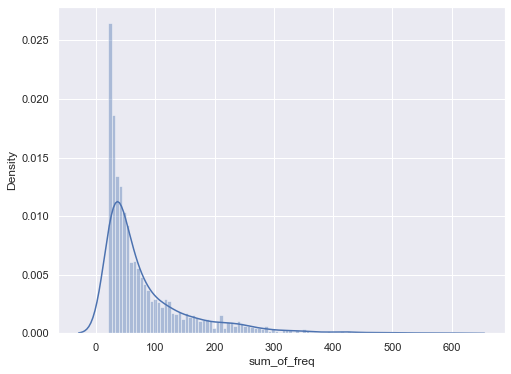

In [334]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(dist_tf['sum_of_freq'], bins=100);

In [376]:
#setting a qunatile for our dataframe
q = df_q["sum_of_freq"].quantile(0.99)

In [392]:
q

274.0

In [377]:
#filering our dataset based on the quantile
df_q[df_q["sum_of_freq"] < q]

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aara,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aarhus,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aarhuskarlshamn,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
aaron,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zthe,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
zume,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
zurich,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [485]:
q_low = df_q["sum_of_freq"].quantile(0.01)
q_hi  = df_q["sum_of_freq"].quantile(0.99)

df_filtered = df_q[(df_q["sum_of_freq"] < q_hi) & (df_q["sum_of_freq"] > q_low)]

In [486]:
df_filtered.sort_values(by="sum_of_freq", ascending=True).head(10)

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
indulgers,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
individualization,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
indented,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
incurred,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
imposes,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
importing,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
implored,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
imparting,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
immersed,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


C:\Users\FaridSarwari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


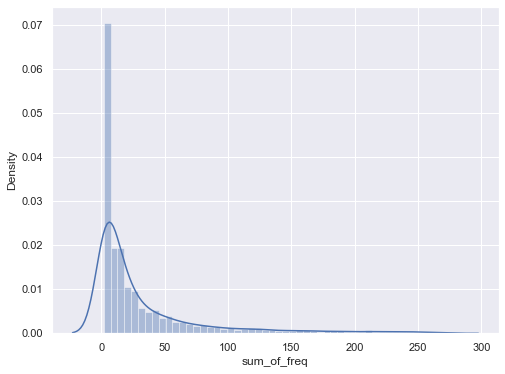

In [384]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(df_filtered['sum_of_freq'], bins=50);

A lot of the words in our dataset have a low frequency, between 0 and 50.

In [404]:
#Setting a new threshold and removing of outliers (terms with TF less than 20) in our dataset

df_q_tidy = df_q[(df_q["sum_of_freq"]>20) & (df_q["sum_of_freq"]<700)].sort_values(by ="sum_of_freq" , ascending=False)
df_q_tidy.head()

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
sodium,2,7,70,48,26,89,18,34,14,12,...,1,0,2,0,3,1,1,0,1,605
bread,7,20,12,77,14,11,10,19,11,14,...,3,9,3,7,7,4,7,7,2,601
clean,0,3,1,8,11,6,0,21,10,12,...,2,3,40,3,2,15,6,10,0,576
cereal,5,35,18,67,28,13,10,45,23,12,...,6,15,2,15,5,18,2,1,8,560
gram,1,26,10,43,22,14,7,20,27,16,...,7,6,14,11,6,20,5,11,1,555


C:\Users\FaridSarwari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


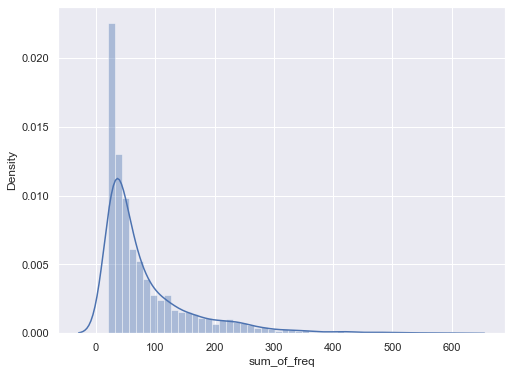

In [464]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(df_q_tidy['sum_of_freq'], bins=50);

In [420]:
df_q_tidy.head()

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
sodium,2,7,70,48,26,89,18,34,14,12,...,1,0,2,0,3,1,1,0,1,605
bread,7,20,12,77,14,11,10,19,11,14,...,3,9,3,7,7,4,7,7,2,601
clean,0,3,1,8,11,6,0,21,10,12,...,2,3,40,3,2,15,6,10,0,576
cereal,5,35,18,67,28,13,10,45,23,12,...,6,15,2,15,5,18,2,1,8,560
gram,1,26,10,43,22,14,7,20,27,16,...,7,6,14,11,6,20,5,11,1,555


In [421]:
df_q_final = df_q_tidy.iloc[ 0:, :-1]

In [422]:
df_q_final.iloc[ 0:10 , ]

article_date_published,2012-09-30,2012-12-31,2013-03-31,2013-06-30,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,...,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
sodium,2,7,70,48,26,89,18,34,14,12,...,1,1,0,2,0,3,1,1,0,1
bread,7,20,12,77,14,11,10,19,11,14,...,5,3,9,3,7,7,4,7,7,2
clean,0,3,1,8,11,6,0,21,10,12,...,30,2,3,40,3,2,15,6,10,0
cereal,5,35,18,67,28,13,10,45,23,12,...,16,6,15,2,15,5,18,2,1,8
gram,1,26,10,43,22,14,7,20,27,16,...,10,7,6,14,11,6,20,5,11,1
pizza,19,9,1,8,11,3,6,12,5,62,...,9,12,47,6,38,1,4,1,63,6
corn,13,4,12,40,40,32,42,28,10,6,...,4,5,0,3,1,1,2,4,1,3
sauce,2,2,16,27,6,3,11,20,13,13,...,4,9,3,25,7,10,17,10,25,13
coffee,0,2,1,3,8,9,2,15,13,18,...,18,21,8,7,23,4,20,5,26,9
labeling,0,4,30,41,11,27,35,52,2,18,...,1,0,6,7,2,0,1,1,1,0


### Visualisations

####  corpus

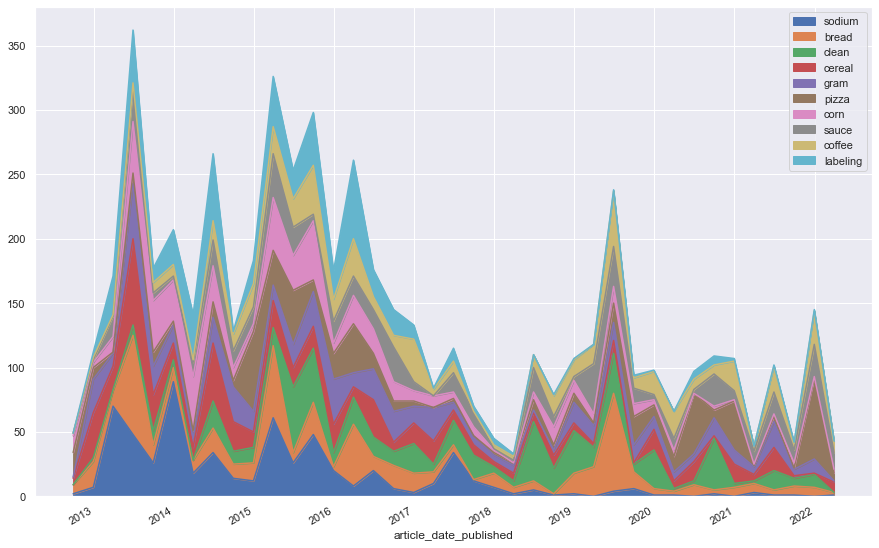

In [524]:
#visualising first 10 terms in our dataset
df_q_final.iloc[ 0:10 , :].T.plot(kind='area', figsize=(15,10), stacked=True)
# Move the legend off of the chart
#ax.legend(loc=(1.04,0))
plt.show()

#### Evolution of upper tail terms

In [ ]:
upp_tail = df_q["sum_of_freq"].quantile(0.99)

df_upper_tail = df_q[(df_q["sum_of_freq"] > upp_tail)]

<AxesSubplot:xlabel='article_date_published'>

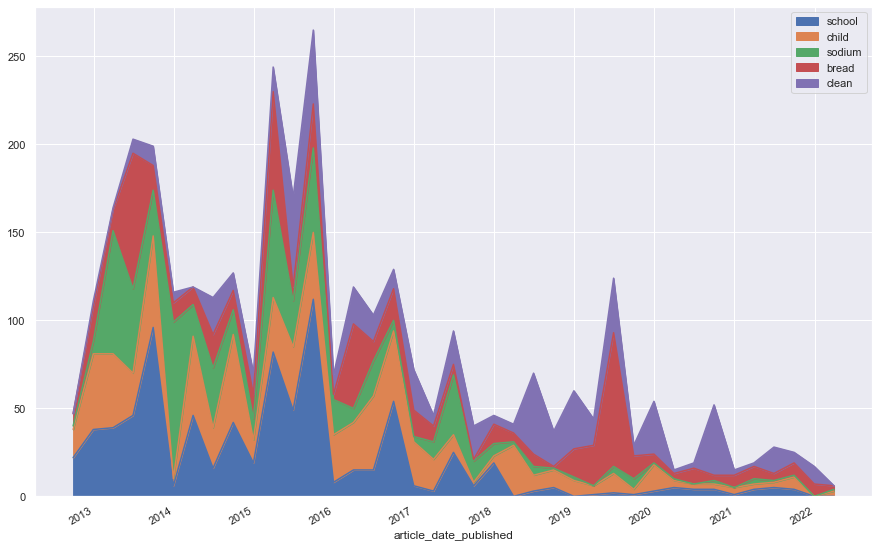

In [502]:
# plot of the top-5 terms in the upper-tail of the corpus - with upper tail threshold of 274 TF at 0.99
df_upper_tail.sort_values(by="sum_of_freq", ascending= False).iloc[0:, :-1 ].head().T.plot(kind='area', figsize=(15,10), stacked=True)

#### Evolution of lower tail terms

In [511]:
lower_tail = df_q["sum_of_freq"].quantile(0.01)

df_lower_tail = df_q[(df_q["sum_of_freq"] > lower_tail)]

<AxesSubplot:xlabel='article_date_published'>

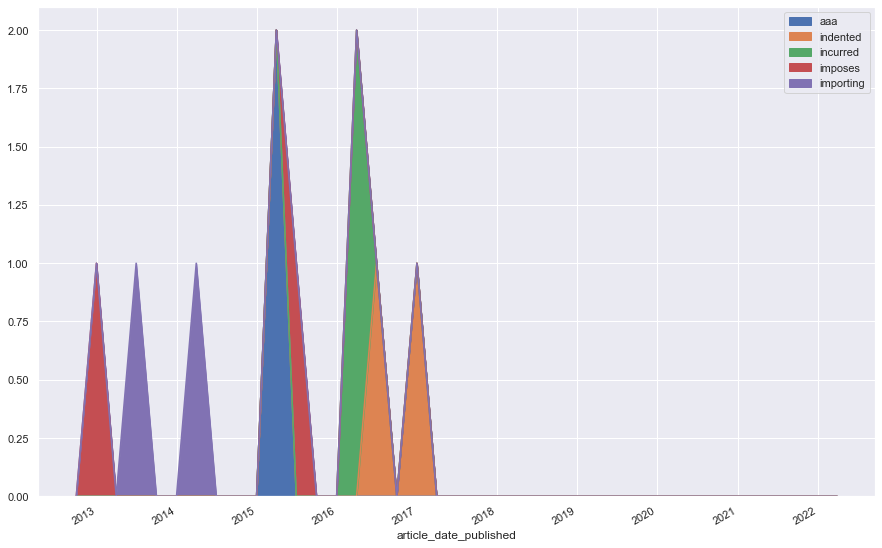

In [514]:
df_lower_tail.sort_values(by="sum_of_freq", ascending= True).iloc[0:, :-1 ].head().T.plot(kind='area', figsize=(15,10), stacked=True)

#### Evolution of terms around the mean

In [517]:
df_up = df_q["sum_of_freq"].quantile(0.55)
df_low = df_q["sum_of_freq"].quantile(0.45)

df_mean_centre = df_q[(df_q["sum_of_freq"] < df_up) & (df_q["sum_of_freq"] > df_low)]

<AxesSubplot:xlabel='article_date_published'>

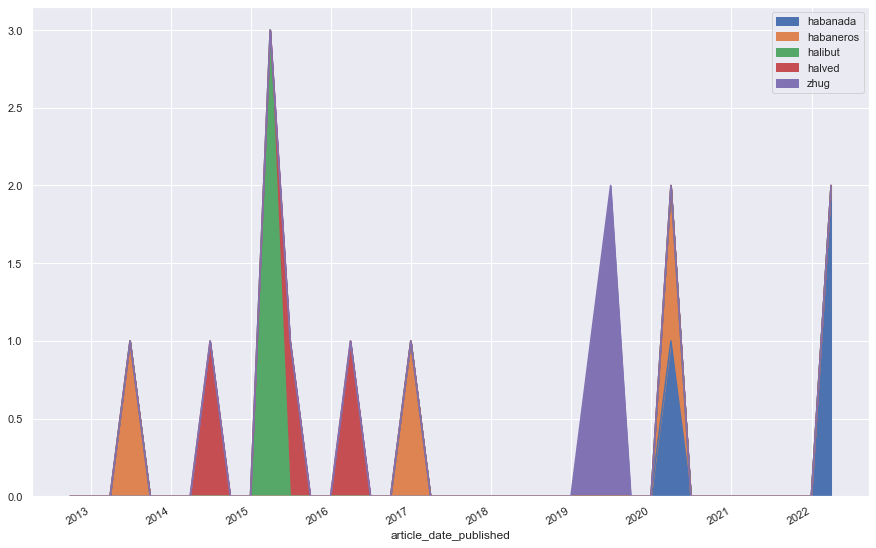

In [523]:
df_mean_centre.sort_values(by="sum_of_freq", ascending=False).iloc[0:, :-1 ].tail().T.plot(kind='area', figsize=(15,10), stacked=True)

#### Finding Max Diff

In [476]:
#finding maximum value per a rolling window period 
df_max_diff = df_q_final.T.rolling(window=3,min_periods=3).max().reset_index().drop(columns=["article_date_published"]).iloc[2:, ]
df_max_diff.head()

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
2,70.0,20.0,3.0,35.0,26.0,19.0,13.0,16.0,2.0,30.0,...,1.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0
3,70.0,77.0,8.0,67.0,43.0,9.0,40.0,27.0,3.0,41.0,...,1.0,0.0,3.0,1.0,5.0,3.0,0.0,0.0,0.0,1.0
4,70.0,77.0,11.0,67.0,43.0,11.0,40.0,27.0,8.0,41.0,...,2.0,2.0,3.0,0.0,3.0,3.0,3.0,0.0,1.0,1.0
5,89.0,77.0,11.0,67.0,43.0,11.0,40.0,27.0,9.0,41.0,...,2.0,2.0,3.0,2.0,2.0,3.0,12.0,0.0,1.0,1.0
6,89.0,14.0,11.0,28.0,22.0,11.0,42.0,11.0,9.0,35.0,...,2.0,2.0,1.0,2.0,2.0,1.0,12.0,1.0,1.0,1.0


In [477]:
#calculating the difference between the max values in each period moving forward
max_diff= df_max_diff.diff(axis=0).T
max_diff

,2,3,4,5,6,7,8,9,10,11,...,29,30,31,32,33,34,35,36,37,38
sodium,NaN,0.0,0.0,19.0,0.0,0.0,-55.0,0.0,27.0,0.0,...,0.0,0.0,-5.0,1.0,0.0,1.0,0.0,0.0,-2.0,0.0
bread,NaN,57.0,0.0,0.0,-63.0,5.0,0.0,0.0,37.0,0.0,...,0.0,-63.0,-4.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0
clean,NaN,5.0,3.0,0.0,0.0,10.0,0.0,0.0,-7.0,37.0,...,0.0,-1.0,0.0,10.0,0.0,0.0,-25.0,0.0,0.0,-5.0
cereal,NaN,32.0,0.0,0.0,-39.0,17.0,0.0,0.0,-22.0,-2.0,...,6.0,0.0,0.0,-1.0,0.0,0.0,3.0,0.0,0.0,-10.0
gram,NaN,17.0,0.0,0.0,-21.0,-2.0,7.0,0.0,0.0,-9.0,...,0.0,0.0,-4.0,4.0,0.0,0.0,6.0,0.0,0.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,NaN,2.0,0.0,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ethanol,NaN,0.0,3.0,9.0,0.0,0.0,-8.0,-4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pledged,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perishable,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,-3.0,1.0,...,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [478]:
#adding up all the differences between each period
max_diff["sum_max_diff"] = max_diff.sum(axis=1)
max_diff

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,sum_max_diff
sodium,NaN,0.0,0.0,19.0,0.0,0.0,-55.0,0.0,27.0,0.0,...,0.0,-5.0,1.0,0.0,1.0,0.0,0.0,-2.0,0.0,-69.0
bread,NaN,57.0,0.0,0.0,-63.0,5.0,0.0,0.0,37.0,0.0,...,-63.0,-4.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,-13.0
clean,NaN,5.0,3.0,0.0,0.0,10.0,0.0,0.0,-7.0,37.0,...,-1.0,0.0,10.0,0.0,0.0,-25.0,0.0,0.0,-5.0,7.0
cereal,NaN,32.0,0.0,0.0,-39.0,17.0,0.0,0.0,-22.0,-2.0,...,0.0,0.0,-1.0,0.0,0.0,3.0,0.0,0.0,-10.0,-27.0
gram,NaN,17.0,0.0,0.0,-21.0,-2.0,7.0,0.0,0.0,-9.0,...,0.0,-4.0,4.0,0.0,0.0,6.0,0.0,0.0,-9.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,NaN,2.0,0.0,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ethanol,NaN,0.0,3.0,9.0,0.0,0.0,-8.0,-4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pledged,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perishable,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,-3.0,1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0


In [479]:
max_diff.sort_values("sum_max_diff", ascending=False).iloc[0:5, ]

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,sum_max_diff
pandemic,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,26.0,7.0,31.0,0.0,0.0,4.0,0.0,0.0,74.0
pizza,NaN,-10.0,2.0,0.0,0.0,1.0,0.0,50.0,0.0,0.0,...,0.0,25.0,0.0,0.0,-9.0,0.0,-34.0,59.0,0.0,44.0
vegan,NaN,0.0,0.0,-2.0,0.0,3.0,8.0,0.0,1.0,0.0,...,-33.0,0.0,0.0,-20.0,0.0,0.0,27.0,0.0,0.0,33.0
crust,NaN,1.0,3.0,0.0,0.0,-2.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-11.0,0.0,-6.0,33.0,0.0,33.0
online,NaN,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,15.0,1.0,0.0,0.0,0.0,-3.0,0.0,28.0


In [480]:
max_diff.sort_values("sum_max_diff", ascending=False).iloc[ :, 37:]

,sum_max_diff
pandemic,74.0
pizza,44.0
vegan,33.0
crust,33.0
online,28.0
...,...
index,-36.0
obesity,-40.0
bagel,-41.0
greek,-48.0


C:\Users\FaridSarwari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


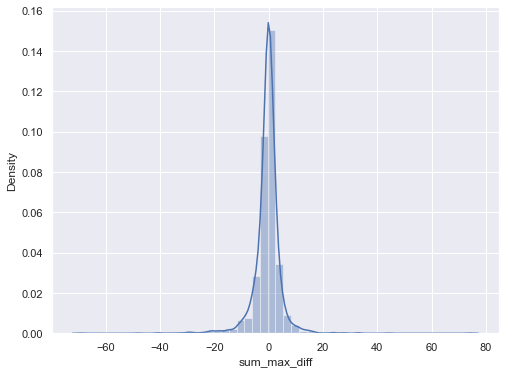

In [525]:
# plotting the distribution of sum of difference
plt.figure(figsize=(8,6))
sns.distplot(max_diff['sum_max_diff'], bins=50);

#### High Growth Frequency Terms

In [481]:
max_diff.sort_values("sum_max_diff", ascending=False).iloc[ :, 37:].head(10).index

Index(['pandemic', 'pizza', 'vegan', 'crust', 'online', 'covid', 'barbecue',
       'coffee', 'hostess', 'regenerative'],
      dtype='object')

<AxesSubplot:xlabel='article_date_published'>

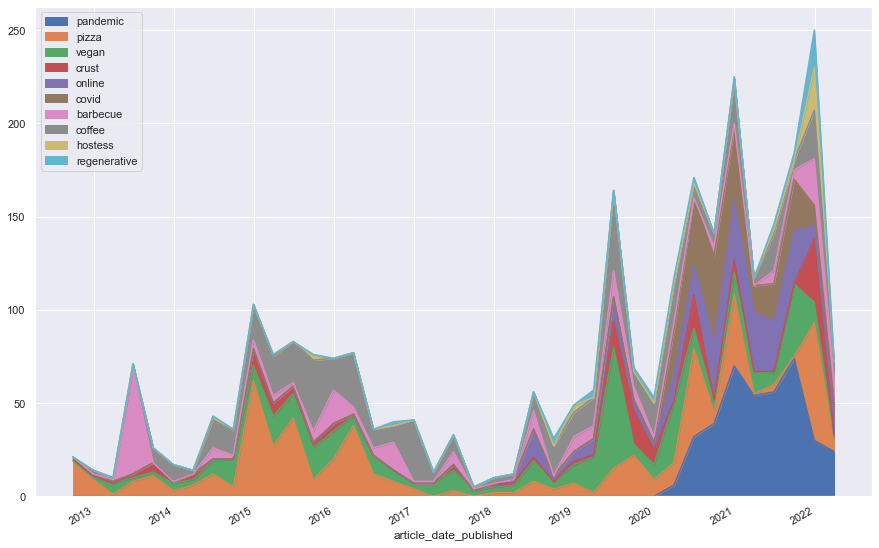

In [742]:
index = ['pandemic', 'pizza', 'vegan', 'crust', 'online', 'covid', 'barbecue',
       'coffee', 'hostess', 'regenerative']

df_q_final.loc[ index , ].T.plot(kind='area', figsize=(15,10), stacked=True)

#### Low Growth Frequency Terms

In [483]:
max_diff.sort_values("sum_max_diff", ascending=False).iloc[ :, 37:].tail(10).index

Index(['labeling', 'burger', 'phosphate', 'percent', 'powder', 'index',
       'obesity', 'bagel', 'greek', 'sodium'],
      dtype='object')

<AxesSubplot:xlabel='article_date_published'>

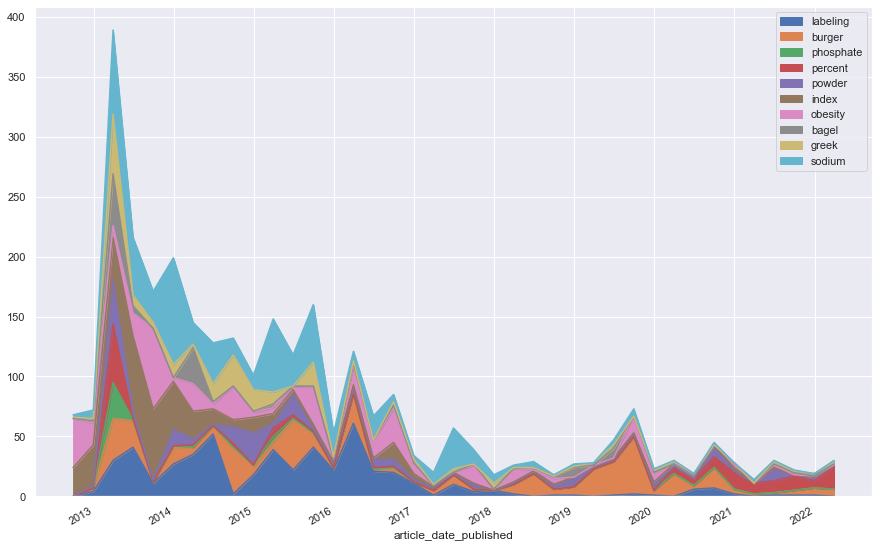

In [484]:
index = ['labeling', 'burger', 'phosphate', 'percent', 'powder', 'index',
       'obesity', 'bagel', 'greek', 'sodium']

df_q_final.loc[ index , ].T.plot(kind='area', figsize=(15,10), stacked=True)

In [ ]:
q_low = df_q["sum_of_freq"].quantile(0.01)
q_hi  = df_q["sum_of_freq"].quantile(0.99)

df_filtered = df_q[(df_q["sum_of_freq"] < q_hi) & (df_q["sum_of_freq"] > q_low)]

In [495]:
upp_tail = df_q["sum_of_freq"].quantile(0.99)

df_upper_tail = df_q[(df_q["sum_of_freq"] > upp_tail)]

In [497]:
df_upper_tail.sort_values(by="sum_of_freq", ascending= False).head()

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
school,22,38,39,46,96,6,46,16,42,19,...,5,4,4,1,4,5,4,0,0,806
child,16,43,42,24,52,4,45,23,50,13,...,4,3,3,4,3,3,7,0,3,733
sodium,2,7,70,48,26,89,18,34,14,12,...,1,0,2,0,3,1,1,0,1,605
bread,7,20,12,77,14,11,10,19,11,14,...,3,9,3,7,7,4,7,7,2,601
clean,0,3,1,8,11,6,0,21,10,12,...,2,3,40,3,2,15,6,10,0,576


#### TF-IDF

In [528]:
df_mul.head()

,aaa,aara,aarhus,aarhuskarlshamn,aaron,abandoned,abandoning,abated,abating,abbott,...,zoghbi,zola,zombie,zone,zoned,zong,zthe,zume,zurich,éclair
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.0,0.0,0.0,0.0,0.0,4.654978,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-09-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2012-11-30,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.674149,0.0
2012-12-31,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [551]:
cols = df_q_final.T.columns

df_mul[cols].T

article_date_published,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,...,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28
sodium,0.030089,0.000000,0.048472,0.000000,0.008253,0.207446,0.027365,0.096928,0.033725,0.115581,...,0.000000,0.006575,0.000000,0.007577,0.000000,0.000000,0.000000,0.000000,0.008277,0.000000
bread,0.012904,0.045440,0.055435,0.083111,0.028317,0.011862,0.005868,0.031672,0.057854,0.161752,...,0.000000,0.016920,0.000000,0.025995,0.020918,0.021902,0.021431,0.006750,0.014199,0.000000
clean,0.000000,0.000000,0.000000,0.021528,0.007335,0.004097,0.000000,0.000000,0.000000,0.002703,...,0.021204,0.052592,0.013797,0.026933,0.000000,0.017019,0.000000,0.048952,0.000000,0.000000
cereal,0.051163,0.007507,0.130503,0.113274,0.035086,0.019597,0.034899,0.027470,0.186375,0.100854,...,0.006762,0.044724,0.006600,0.006442,0.000000,0.000000,0.000000,0.006690,0.042224,0.021426
gram,0.000000,0.007709,0.063477,0.021148,0.108084,0.020123,0.017918,0.008059,0.103051,0.058420,...,0.000000,0.109073,0.006777,0.013229,0.014194,0.039013,0.043628,0.000000,0.000000,0.011001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,0.000000,0.000000,0.015803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011899,...,0.000000,0.000000,0.015185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ethanol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pledged,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
perishable,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015901,0.000000,0.024437,0.015392,0.000000,0.000000


<AxesSubplot:xlabel='article_date_published'>

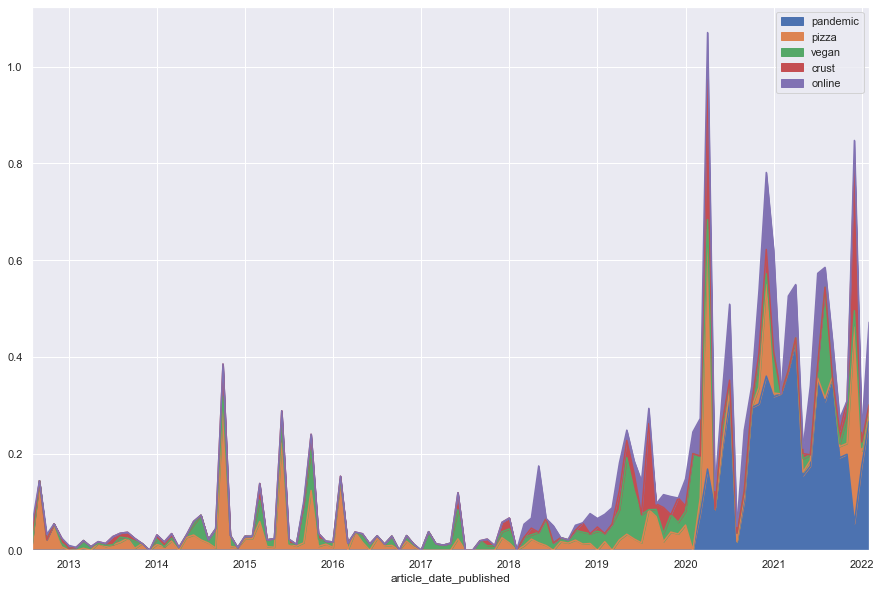

In [740]:
index = ['pandemic', 'pizza', 'vegan', 'crust', 'online']

df_mul[cols].T.loc[index , ].T.plot(kind='area', figsize=(15,10), stacked=True)

In [701]:
df_tfidf = df_mul[cols] 

In [731]:
df_tfidf

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.030089,0.012904,0.000000,0.051163,0.000000,0.013611,0.026979,0.013489,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2012-09-30,0.000000,0.045440,0.000000,0.007507,0.007709,0.143785,0.087087,0.007917,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2012-10-31,0.048472,0.055435,0.000000,0.130503,0.063477,0.021926,0.000000,0.000000,0.013737,0.008548,...,0.0,0.0,0.000000,0.017132,0.049285,0.015803,0.0,0.0,0.000000,0.000000
2012-11-30,0.000000,0.083111,0.021528,0.113274,0.021148,0.054788,0.043441,0.000000,0.000000,0.012815,...,0.0,0.0,0.000000,0.000000,0.024630,0.000000,0.0,0.0,0.000000,0.000000
2012-12-31,0.008253,0.028317,0.007335,0.035086,0.108084,0.007467,0.000000,0.014801,0.000000,0.017465,...,0.0,0.0,0.000000,0.000000,0.016784,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.000000,0.021902,0.017019,0.000000,0.039013,0.023101,0.005724,0.028620,0.010855,0.006754,...,0.0,0.0,0.000000,0.013538,0.000000,0.000000,0.0,0.0,0.000000,0.013251
2021-11-30,0.000000,0.021431,0.000000,0.000000,0.043628,0.022605,0.000000,0.022404,0.063730,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.024437,0.000000
2021-12-31,0.000000,0.006750,0.048952,0.006690,0.000000,0.405787,0.000000,0.127003,0.120425,0.000000,...,0.0,0.0,0.016688,0.000000,0.000000,0.000000,0.0,0.0,0.015392,0.000000


### Finding peaks

In [752]:
df_pand = df_tfidf.iloc[0:, df_tfidf.columns=='pandemic']
df_pand

,pandemic
article_date_published,
2012-08-31,0.000000
2012-09-30,0.000000
2012-10-31,0.000000
2012-11-30,0.000000
2012-12-31,0.000000
...,...
2021-10-31,0.191542
2021-11-30,0.198450
2021-12-31,0.055555


(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


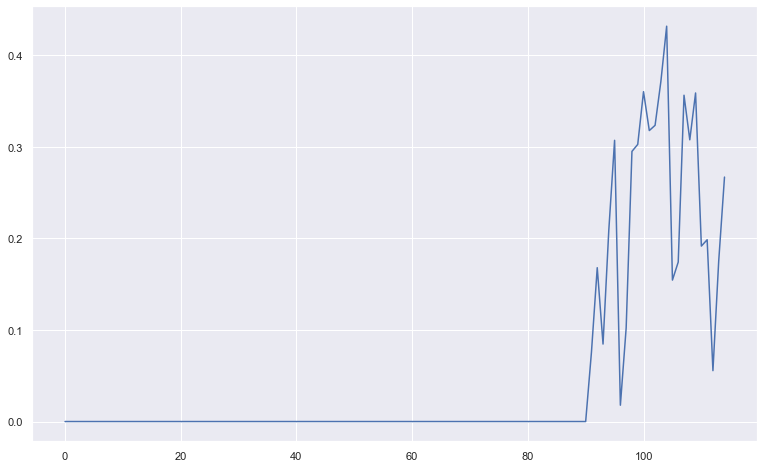

In [753]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


numbers = df_pand['pandemic'].values

#finding peaks for 1D array
# peaks = find_peaks(numbers, height = 300, threshold = 1, distance = 5)

peaks = find_peaks(numbers, height = 1, threshold = None, distance=10)
height = peaks[1]['peak_heights'] #list of heights of peaks
peak_pos = peaks[0]
print(peaks)

# plot the peaks
fig = plt.figure()
ax = fig.subplots()
ax.plot(numbers)
ax.scatter(peak_pos, height,color = 'r', s = 25, label = 'Maxima')
ax.legend

## add numbers as text annotations
for i, text in enumerate(height):
    if text.is_integer():
        ax.annotate(int(text), (peak_pos[i], height[i]), size=10)
    else:
        ax.annotate(text, (peak_pos[i], height[i]), size=10)
plt.show()

<AxesSubplot:xlabel='article_date_published'>

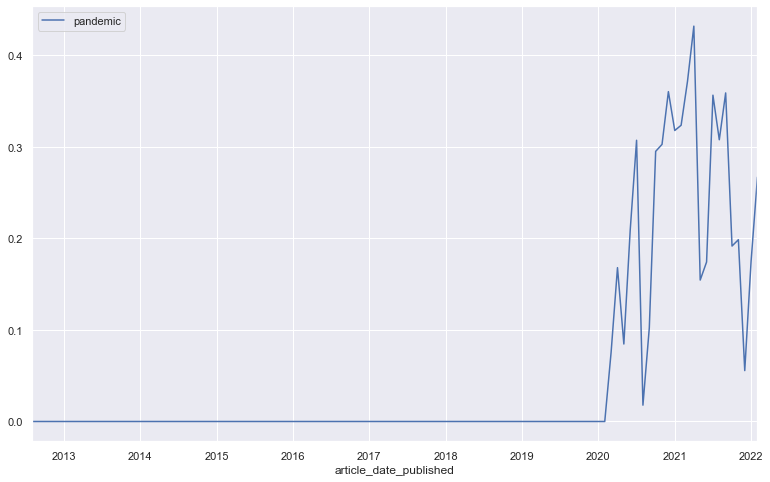

In [738]:
df_tfidf.iloc[0:, df_tfidf.columns=='pandemic'].plot()

<AxesSubplot:xlabel='article_date_published'>

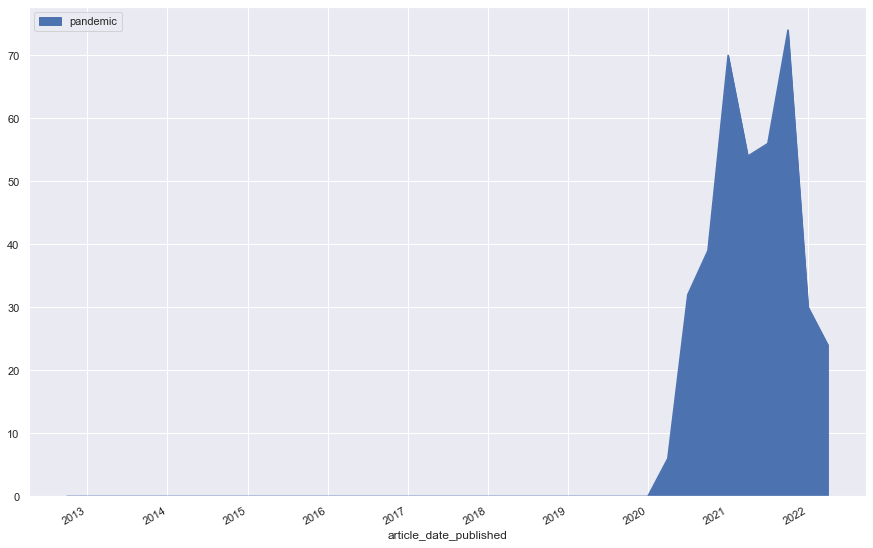

In [743]:
index = ['pandemic']

df_q_final.loc[ index , ].T.plot(kind='area', figsize=(15,10), stacked=True)

<AxesSubplot:xlabel='article_date_published'>

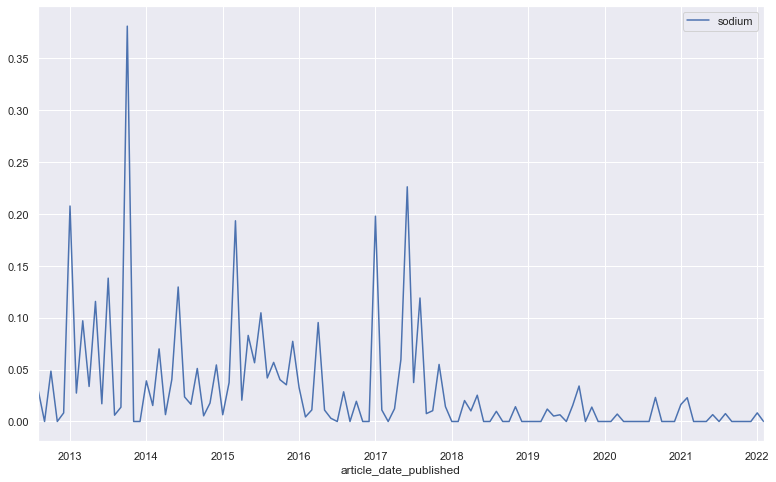

In [733]:
sodium = df_tfidf.iloc[0:, 0:1]
sodium.plot()

<AxesSubplot:xlabel='article_date_published'>

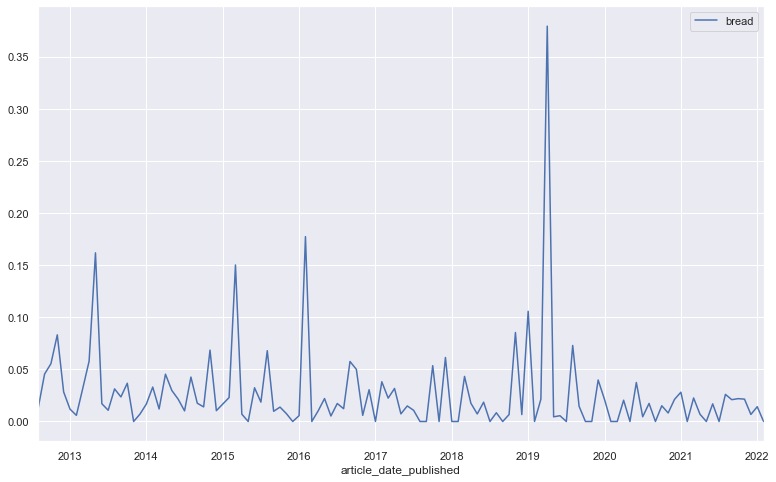

In [734]:
bread = df_tfidf.iloc[0:, 1:2]
bread.plot()

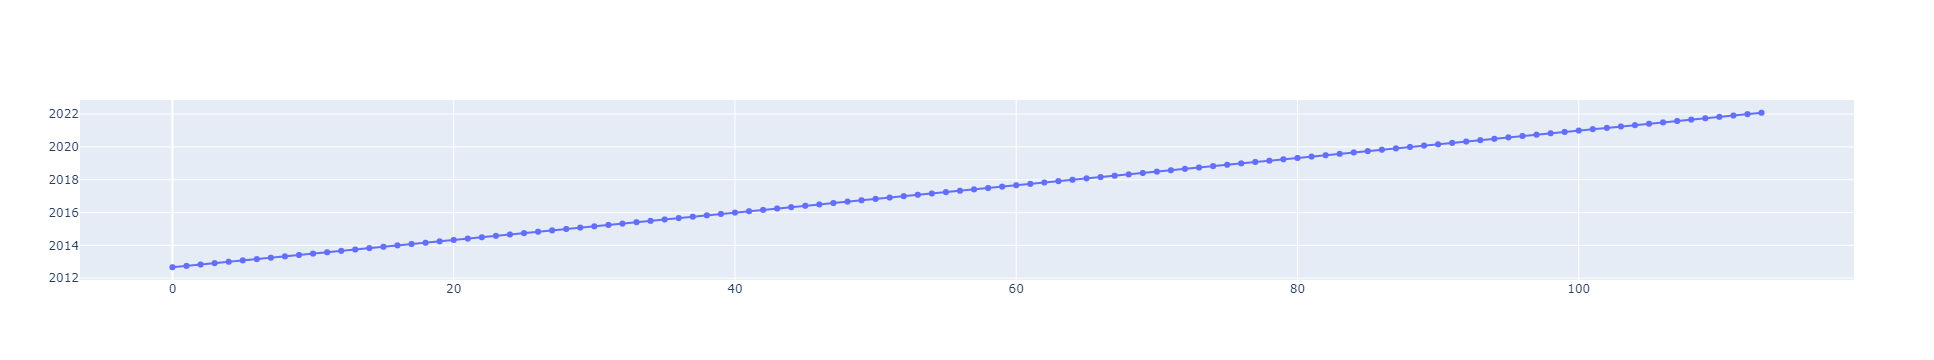

In [725]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

milk_data = sodium
time_series = sodium['article_date_published']

indices = find_peaks(time_series, threshold=20)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

<AxesSubplot:xlabel='article_date_published'>

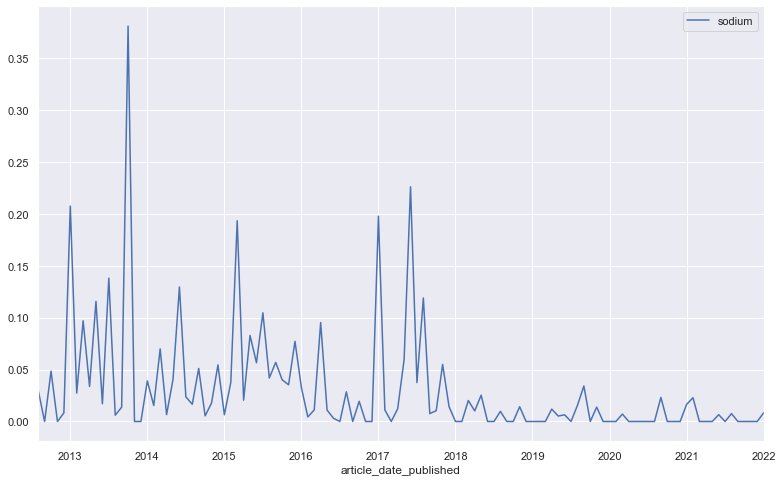

In [728]:
sodium.plot()

In [711]:
df_tfidf.loc['2012']

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0.030089,0.012904,0.000000,0.051163,0.000000,0.013611,0.026979,0.013489,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2012-09-30,0.000000,0.045440,0.000000,0.007507,0.007709,0.143785,0.087087,0.007917,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2012-10-31,0.048472,0.055435,0.000000,0.130503,0.063477,0.021926,0.000000,0.000000,0.013737,0.008548,...,0.0,0.0,0.0,0.017132,0.049285,0.015803,0.0,0.0,0.0,0.0
2012-11-30,0.000000,0.083111,0.021528,0.113274,0.021148,0.054788,0.043441,0.000000,0.000000,0.012815,...,0.0,0.0,0.0,0.000000,0.024630,0.000000,0.0,0.0,0.0,0.0
2012-12-31,0.008253,0.028317,0.007335,0.035086,0.108084,0.007467,0.000000,0.014801,0.000000,0.017465,...,0.0,0.0,0.0,0.000000,0.016784,0.000000,0.0,0.0,0.0,0.0


In [128]:
#df_q_rolling = df.resample("1d").sum().fillna(0).rolling(window=3, min_periods=1).mean()

In [131]:
test = df_q_final.T.rolling(window=3,min_periods=3).mean().reset_index().drop(columns=["article_date_published"]).iloc[2:, ]

In [132]:
test.head()

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
2,26.333333,13.000000,1.333333,19.333333,12.333333,9.666667,9.666667,6.666667,1.000000,11.333333,...,0.333333,0.000000,0.000000,0.333333,2.666667,0.333333,0.000000,0.000000,0.000000,0.000000
3,41.666667,36.333333,4.000000,40.000000,26.333333,6.000000,18.666667,15.000000,2.000000,25.000000,...,0.333333,0.000000,1.000000,0.333333,2.666667,1.333333,0.000000,0.000000,0.000000,0.333333
4,48.000000,34.333333,6.666667,37.666667,25.000000,6.666667,30.666667,16.333333,4.000000,27.333333,...,1.000000,0.666667,1.333333,0.000000,1.666667,1.333333,1.000000,0.000000,0.333333,0.666667
5,54.333333,34.000000,8.333333,36.000000,26.333333,7.333333,37.333333,12.000000,6.666667,26.333333,...,0.666667,1.333333,1.333333,0.666667,1.000000,1.333333,5.000000,0.000000,0.333333,0.666667
6,44.333333,11.666667,5.666667,17.000000,14.333333,6.666667,38.000000,6.666667,6.333333,24.333333,...,0.666667,1.666667,0.333333,1.333333,1.333333,0.333333,6.333333,0.333333,0.333333,0.333333


In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 2 to 38
Columns: 2900 entries, sodium to zinc
dtypes: float64(2900)
memory usage: 838.4 KB


In [134]:
test1 = df_q_final.T.rolling(window=3,min_periods=3).max().reset_index().drop(columns=["article_date_published"]).iloc[2:, ]

In [135]:
test1.head()

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
2,70.0,20.0,3.0,35.0,26.0,19.0,13.0,16.0,2.0,30.0,...,1.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0
3,70.0,77.0,8.0,67.0,43.0,9.0,40.0,27.0,3.0,41.0,...,1.0,0.0,3.0,1.0,5.0,3.0,0.0,0.0,0.0,1.0
4,70.0,77.0,11.0,67.0,43.0,11.0,40.0,27.0,8.0,41.0,...,2.0,2.0,3.0,0.0,3.0,3.0,3.0,0.0,1.0,1.0
5,89.0,77.0,11.0,67.0,43.0,11.0,40.0,27.0,9.0,41.0,...,2.0,2.0,3.0,2.0,2.0,3.0,12.0,0.0,1.0,1.0
6,89.0,14.0,11.0,28.0,22.0,11.0,42.0,11.0,9.0,35.0,...,2.0,2.0,1.0,2.0,2.0,1.0,12.0,1.0,1.0,1.0


In [167]:
max_diff= test1.diff(axis=0).T

In [168]:
#Difference between rows(Period=1)

max_diff

,2,3,4,5,6,7,8,9,10,11,...,29,30,31,32,33,34,35,36,37,38
sodium,NaN,0.0,0.0,19.0,0.0,0.0,-55.0,0.0,27.0,0.0,...,0.0,0.0,-5.0,1.0,0.0,1.0,0.0,0.0,-2.0,0.0
bread,NaN,57.0,0.0,0.0,-63.0,5.0,0.0,0.0,37.0,0.0,...,0.0,-63.0,-4.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0
clean,NaN,5.0,3.0,0.0,0.0,10.0,0.0,0.0,-7.0,37.0,...,0.0,-1.0,0.0,10.0,0.0,0.0,-25.0,0.0,0.0,-5.0
cereal,NaN,32.0,0.0,0.0,-39.0,17.0,0.0,0.0,-22.0,-2.0,...,6.0,0.0,0.0,-1.0,0.0,0.0,3.0,0.0,0.0,-10.0
gram,NaN,17.0,0.0,0.0,-21.0,-2.0,7.0,0.0,0.0,-9.0,...,0.0,0.0,-4.0,4.0,0.0,0.0,6.0,0.0,0.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,NaN,2.0,0.0,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ethanol,NaN,0.0,3.0,9.0,0.0,0.0,-8.0,-4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pledged,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perishable,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,-3.0,1.0,...,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [169]:
max_diff["sum_max_diff"] = max_diff.sum(axis=1)
max_diff


,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,sum_max_diff
sodium,NaN,0.0,0.0,19.0,0.0,0.0,-55.0,0.0,27.0,0.0,...,0.0,-5.0,1.0,0.0,1.0,0.0,0.0,-2.0,0.0,-69.0
bread,NaN,57.0,0.0,0.0,-63.0,5.0,0.0,0.0,37.0,0.0,...,-63.0,-4.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,-13.0
clean,NaN,5.0,3.0,0.0,0.0,10.0,0.0,0.0,-7.0,37.0,...,-1.0,0.0,10.0,0.0,0.0,-25.0,0.0,0.0,-5.0,7.0
cereal,NaN,32.0,0.0,0.0,-39.0,17.0,0.0,0.0,-22.0,-2.0,...,0.0,0.0,-1.0,0.0,0.0,3.0,0.0,0.0,-10.0,-27.0
gram,NaN,17.0,0.0,0.0,-21.0,-2.0,7.0,0.0,0.0,-9.0,...,0.0,-4.0,4.0,0.0,0.0,6.0,0.0,0.0,-9.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,NaN,2.0,0.0,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ethanol,NaN,0.0,3.0,9.0,0.0,0.0,-8.0,-4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pledged,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
perishable,NaN,0.0,1.0,0.0,0.0,2.0,0.0,0.0,-3.0,1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0


In [411]:
max_diff.sort_values("sum_max_diff", ascending=False).iloc[0:5, ].index

Index(['pandemic', 'pizza', 'vegan', 'crust', 'online'], dtype='object')

In [194]:
max_diff.sort_values("sum_max_diff", ascending=True).iloc[0:5, 1:-1 ].index

Index(['sodium', 'greek', 'bagel', 'obesity', 'index'], dtype='object')

In [224]:
# weighting more recent peaks 

data = max_diff.iloc[0:, 33:37]

#sample_weight = np.ones(len(X_train)) 
#sample_weight[int(len(sample_weight)*0.5):] = 3

In [513]:
test2 = df_q_final.T.rolling(window=3,min_periods=3).var().reset_index().drop(columns=["article_date_published"]).iloc[2:, ]

In [514]:
test2.head()

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
2,1436.333333,43.000000,2.333333,226.333333,160.333333,81.333333,24.333333,65.333333,1.000000,265.333333,...,0.333333,0.000000,0.000000,3.333333e-01,6.333333,0.333333,0.000000,0.000000,0.000000,0.000000
3,1022.333333,1256.333333,13.000000,619.000000,272.333333,19.000000,357.333333,157.000000,1.000000,361.000000,...,0.333333,0.000000,3.000000,3.333333e-01,6.333333,2.333333,0.000000,0.000000,0.000000,0.333333
4,484.000000,1366.333333,26.333333,670.333333,279.000000,26.333333,261.333333,110.333333,13.000000,230.333333,...,1.000000,1.333333,2.333333,5.551115e-17,2.333333,2.333333,3.000000,0.000000,0.333333,0.333333
5,1022.333333,1389.000000,6.333333,777.000000,224.333333,16.333333,21.333333,171.000000,10.333333,225.333333,...,1.333333,1.333333,2.333333,1.333333e+00,1.000000,2.333333,39.000000,0.000000,0.333333,0.333333
6,1512.333333,4.333333,30.333333,93.000000,56.333333,16.333333,28.000000,16.333333,14.333333,149.333333,...,1.333333,0.333333,0.333333,1.333333e+00,0.333333,0.333333,24.333333,0.333333,0.333333,0.333333


In [515]:
test3 = df_q_final.T.rolling(window=3,min_periods=3).sum().reset_index().drop(columns=["article_date_published"]).iloc[2:, ]

In [517]:
test3.head()

,sodium,bread,clean,cereal,gram,pizza,corn,sauce,coffee,labeling,...,empower,powered,enhancer,enterprise,epidemic,pose,ethanol,pledged,perishable,zinc
2,79.0,39.0,4.0,58.0,37.0,29.0,29.0,20.0,3.0,34.0,...,1.0,0.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0
3,125.0,109.0,12.0,120.0,79.0,18.0,56.0,45.0,6.0,75.0,...,1.0,0.0,3.0,1.0,8.0,4.0,0.0,0.0,0.0,1.0
4,144.0,103.0,20.0,113.0,75.0,20.0,92.0,49.0,12.0,82.0,...,3.0,2.0,4.0,0.0,5.0,4.0,3.0,0.0,1.0,2.0
5,163.0,102.0,25.0,108.0,79.0,22.0,112.0,36.0,20.0,79.0,...,2.0,4.0,4.0,2.0,3.0,4.0,15.0,0.0,1.0,2.0
6,133.0,35.0,17.0,51.0,43.0,20.0,114.0,20.0,19.0,73.0,...,2.0,5.0,1.0,4.0,4.0,1.0,19.0,1.0,1.0,1.0


In [518]:
test4 = df_q_final.T.rolling(window=3,min_periods=3).std().reset_index().drop(columns=["article_date_published"]).iloc[2:, ]

##### Sodium

In [665]:
df_std = test4.iloc[0:, :1]
df_var = test2.iloc[0:, :1]
df_mean= test.iloc[0:, 2:3]
df_max = test1.iloc[0:, :1]

In [667]:
#df_mean

In [636]:
frames = [df_std , df_var, df_mean ]

#pd.merge([df_mean, df_var], axis=0)

In [648]:
result = pd.concat(frames, axis=1)
result.columns = ['std', 'var', 'mean']

#result = result.rename(columns= {'sodium' : 'std', 'sodium': 'var', 'sodium' : 'mean'})

result.head()

,std,var,mean
2,37.898989,1436.333333,26.333333
3,31.973948,1022.333333,41.666667
4,22.000000,484.000000,48.000000
5,31.973948,1022.333333,54.333333
6,38.888730,1512.333333,44.333333


In [ ]:
#df_count_tidy = df_count.copy()
#df_count_tidy['sum_of_freq'] = df_count_tidy[list(df_count_tidy.columns)].sum(axis=1)

#df_count_tidy = df_count_tidy[df_count_tidy["sum_of_freq"]>18]

#df_count_tidy.head()

In [624]:
df_quarterly1 = df_quarterly.reset_index()
df_quarterly1.head()

,article_date_published,aa,aaa,aacc,aak,aara,aarhus,aarhuskarlshamn,aaron,aaronson,...,zoup,zthe,zucchini,zume,zurich,zuromski,zutell,ºc,éclair,ﬁtness
0,2012-09-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-12-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2013-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2013-06-30,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2013-09-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [625]:
df_pivot = df_quarterly.pivot_table(columns='article_date_published')
#df_pivot = df_pivot.dropna()

In [671]:
df_pivot

article_date_published,2012-09-30,2012-12-31,2013-03-31,2013-06-30,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,...,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacc,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
aak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
aara,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuromski,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
zutell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ºc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
éclair,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [672]:
df_pivot['sum_of_freq'] = df_pivot[list(df_pivot.columns)].sum(axis=1)
df_pivot.head()

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aacc,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
aak,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
aara,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [772]:
df_pivot_tidy = df_pivot[df_pivot["sum_of_freq"]>18].sort_values("sum_of_freq", ascending=True)

df_pivot_tidy.iloc[ :10 , ]

article_date_published,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,...,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,sum_of_freq
zucchini,0,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,0,19
displayed,0,0,2,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,1,19
pint,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,19
physically,0,0,1,1,1,1,1,0,0,1,...,0,1,0,0,0,0,3,0,0,19
disposable,0,1,0,1,3,0,1,0,0,1,...,1,3,0,0,0,0,0,0,0,19
phenomenon,0,0,0,2,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,19
distinctive,0,1,1,0,1,1,0,0,0,0,...,0,1,1,1,0,0,0,1,0,19
broadening,0,0,0,0,1,0,0,1,1,1,...,0,0,1,2,0,0,3,0,0,19
permanent,0,1,0,0,2,1,0,1,0,0,...,0,0,1,2,1,0,1,0,1,19
pasture,0,0,0,0,0,2,0,0,0,1,...,1,0,0,2,0,0,1,3,0,19


In [726]:
df_high_freq = df_pivot[df_pivot["sum_of_freq"]>700].sort_values("sum_of_freq", ascending=True)

df_high_freq.shape

(135, 40)

In [727]:
df_high_freq.iloc[ 0: , :-1]

article_date_published,2012-09-30,2012-12-31,2013-03-31,2013-06-30,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,...,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31
alternative,0,6,25,13,8,15,4,17,18,14,...,40,51,33,17,17,24,34,33,31,12
past,8,16,20,31,16,13,18,23,20,34,...,8,19,10,8,11,14,28,19,16,4
among,10,22,15,23,29,18,25,28,23,29,...,17,16,7,10,17,16,28,16,8,14
director,3,10,16,40,38,20,27,20,17,21,...,10,11,9,13,10,6,12,15,18,7
important,8,28,18,28,28,12,17,24,8,22,...,8,8,12,16,9,20,25,15,19,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
new,26,69,115,120,85,61,89,150,94,122,...,65,58,79,61,122,64,109,93,89,51
product,19,150,225,296,237,161,184,288,171,201,...,115,107,111,184,154,77,191,160,126,54
consumer,31,106,162,238,181,147,170,232,149,222,...,169,173,196,198,255,139,262,216,156,127
said,72,182,210,435,366,232,313,388,170,285,...,184,226,207,217,230,175,257,236,194,102


In [731]:
df_pivot.shape[0]-df_pivot_tidy.shape[0]

18836

In [668]:
df_yearly = df_count.resample('Y').sum()
df_yearly['year'] = df_yearly.index.year

In [788]:
df_pivot_tidy.index

Index(['zucchini', 'displayed', 'pint', 'physically', 'disposable',
       'phenomenon', 'distinctive', 'broadening', 'permanent', 'pasture',
       ...
       'also', 'ingredient', 'flavor', 'year', 'company', 'new', 'product',
       'consumer', 'said', 'food'],
      dtype='object', length=3984)

In [799]:
df_pivot_tidy.iloc[ 0: , :-1].plot


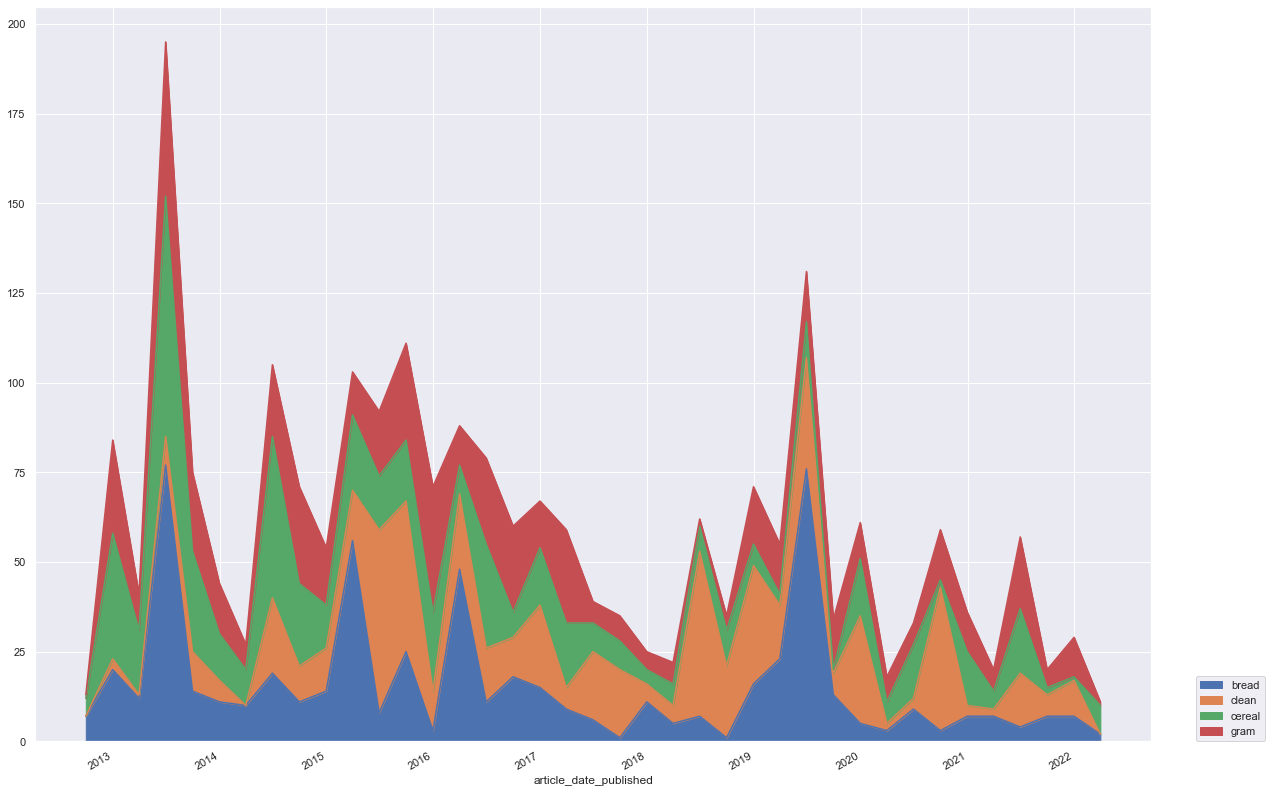

In [451]:
ax = df_q_tidy.iloc[ 1:5 , :-1 ].T.plot(kind='area', figsize=(20,15), stacked=True)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))
plt.show()

In [608]:
df_count.head(10)

,aa,aaa,aacc,aak,aara,aarhus,aarhuskarlshamn,aaron,aaronson,aarp,...,zoup,zthe,zucchini,zume,zurich,zuromski,zutell,ºc,éclair,ﬁtness
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2013-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


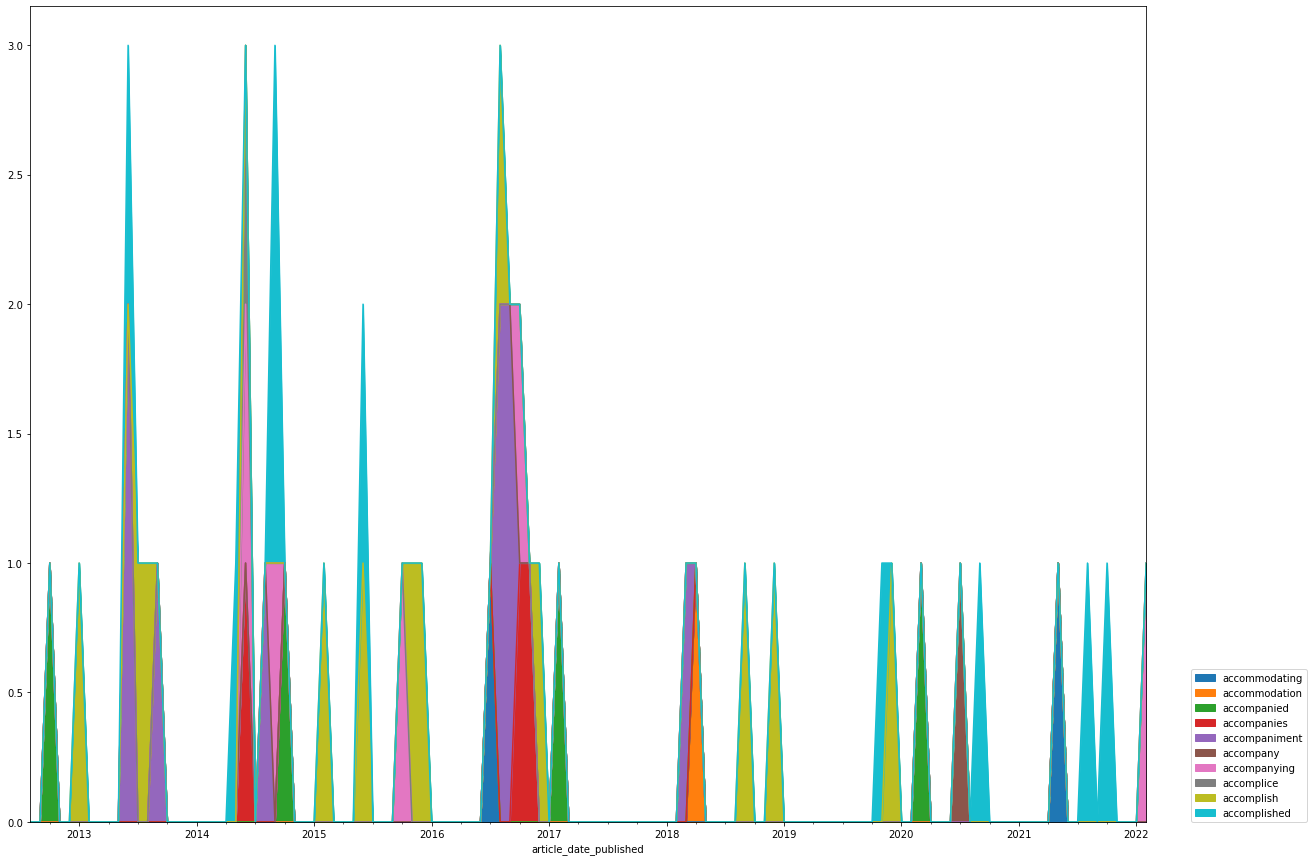

In [607]:
ax = df_count.iloc[ : , 100:110].plot(kind='area', stacked=True, figsize=(20,15))

# Move the legend off of the chart
ax.legend(loc=(1.04,0))
plt.show()


In [262]:
tf['Sum_of_words']  = tf[list(tf.columns)].sum(axis=1)

In [217]:
# Normalised data

import pandas as pd
from sklearn import preprocessing

x = tf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

In [226]:
tf_norm = tf.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


In [227]:
tf_norm.head()

,aa,aaa,aacc,aak,aara,aarhus,aarhuskarlshamn,aaron,aaronson,aarp,...,zoup,zthe,zucchini,zume,zurich,zuromski,zutell,ºc,éclair,ﬁtness
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,-0.008696,-0.008696,-0.017391,-0.008696,-0.008696,-0.008696,-0.008696,-0.026087,-0.008696,-0.013043,...,-0.008696,-0.008696,-0.082609,-0.008696,-0.03913,-0.008696,-0.008696,-0.008696,-0.017391,-0.008696
2012-09-30,-0.008696,-0.008696,-0.017391,-0.008696,-0.008696,-0.008696,-0.008696,-0.026087,-0.008696,-0.013043,...,-0.008696,-0.008696,-0.082609,-0.008696,-0.03913,-0.008696,-0.008696,-0.008696,-0.017391,-0.008696
2012-10-31,-0.008696,-0.008696,-0.017391,-0.008696,-0.008696,-0.008696,-0.008696,-0.026087,-0.008696,-0.013043,...,-0.008696,-0.008696,-0.082609,-0.008696,-0.03913,-0.008696,-0.008696,-0.008696,-0.017391,-0.008696
2012-11-30,-0.008696,-0.008696,-0.017391,-0.008696,-0.008696,-0.008696,-0.008696,-0.026087,-0.008696,-0.013043,...,-0.008696,-0.008696,-0.082609,-0.008696,0.46087,-0.008696,-0.008696,-0.008696,-0.017391,-0.008696
2012-12-31,-0.008696,-0.008696,-0.017391,-0.008696,-0.008696,-0.008696,-0.008696,-0.026087,-0.008696,-0.013043,...,-0.008696,-0.008696,-0.082609,-0.008696,-0.03913,-0.008696,-0.008696,-0.008696,-0.017391,-0.008696


In [270]:
word_freq.sort_values(by= 'freq', ascending=False)[:5]

,freq
keyword,
zero,999
z,998
young,997
york,996
yogurt,995


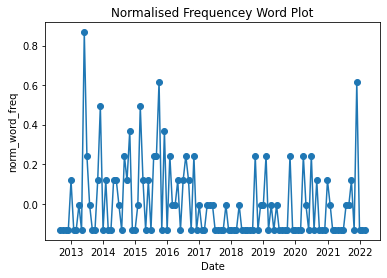

In [249]:
# Import Library

import matplotlib.pyplot as plt

# Plot

plt.plot(tf_norm["zero"], marker='o')

# Labelling 

plt.xlabel("Date")
plt.ylabel("norm_word_freq")
plt.title("Normalised Frequencey Word Plot")

# Display

plt.show()

In [117]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [140]:
idf[ : 10]

,feature_name,idf_weights
0,aa,5.060443
1,aaa,5.060443
2,aacc,4.144152
3,aak,5.060443
4,aara,5.060443
5,aarhus,5.060443
6,aarhuskarlshamn,5.060443
7,aaron,4.367296
8,aaronson,5.060443
9,aarp,4.654978


In [141]:
tf_idf = pd.DataFrame(X.toarray() ,columns=cv.get_feature_names())

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [142]:
tf_idf

,aa,aaa,aacc,aak,aara,aarhus,aarhuskarlshamn,aaron,aaronson,aarp,...,zoup,zthe,zucchini,zume,zurich,zuromski,zutell,ºc,éclair,ﬁtness
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02147,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
111,0.056492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
112,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
113,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [311]:
#TFIDF using sklearn's vectorizer library

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(dataset)

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df3 = pd.DataFrame(denselist, columns=feature_names)

C:\Users\FaridSarwari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [312]:
df3

,aaa,aacc,aara,aarhus,aarhuskarlshamn,aaron,aaronson,aarp,aback,abandon,...,zoonotic,zoup,zthe,zucchini,zume,zurich,zuromski,zutell,éclair,ﬁtness
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027241,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.022025,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [393]:
test = df_clean["article_text"].tolist()

In [398]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter


import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

In [384]:
def convert_lower_case(data):
    return np.char.lower(data)

In [385]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [386]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [387]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [388]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [389]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [401]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

In [403]:
#preprocess(test)

In [81]:
df2["tokens"] = [x.lower().split() for x in df2.article_text_processed.values] 
print(df2.head())

                              article_text_processed  \
0  rome paradigm shift favor food biodiversity aw...   
1  washington four corn refiner association membe...   
2  chicago typical quick service restaurant custo...   
3  duiven netherlands influence knowledgeable inf...   
4  omaha smaller frequent eating pattern big tren...   

                                              tokens  
0  [rome, paradigm, shift, favor, food, biodivers...  
1  [washington, four, corn, refiner, association,...  
2  [chicago, typical, quick, service, restaurant,...  
3  [duiven, netherlands, influence, knowledgeable...  
4  [omaha, smaller, frequent, eating, pattern, bi...  


In [163]:
tf1 = df2.tokens.apply(lambda x: pd.Series(x).value_counts()).fillna(0)   
tf1.sort_index(inplace=True, axis=1)

In [164]:
# 'aaa' feature doesn't seems good feature so, removing it from tf 
tf1.drop('aaa', axis=1, inplace=True)
tf

,aa,aaa,aacc,aak,aara,aarhus,aarhuskarlshamn,aaron,aaronson,aarp,...,zoup,zthe,zucchini,zume,zurich,zuromski,zutell,ºc,éclair,ﬁtness
article_date_published,,,,,,,,,,,,,,,,,,,,,
2012-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-11-30,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
import numpy as np
idf = pd.Series([np.log((float(df2.shape[0])+1)/(len([x for x in df2.tokens.values if token in x])+1))+1 for token in tf.columns])
idf.index = tf.columns
print(idf)

aacc               4.144152
aak                5.060443
aara               5.060443
aarhus             5.060443
aarhuskarlshamn    5.060443
                     ...   
¼                  4.144152
½                  5.060443
à                  5.060443
éclair             4.654978
ﬁtness             5.060443
Length: 22840, dtype: float64


In [373]:
from itertools import chain

print(list(chain(*data_ready)))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [375]:
unique_data = [list(x) for x in set(tuple(x) for x in data_ready)]

In [378]:
def unique_values(lst):
    result = set(x for l in lst for x in l)
    return list(result)

In [404]:
#unique_values(data_ready)

In [169]:
list_of_words = dataset

In [170]:
num_words = dict.fromkeys(unique_words, 0)
for word in list_of_words:
    num_words[word] +=1

In [172]:
def computeTF(word_dict, list_of_words):
    tf_dict = {}
    words_count=len(list_of_words)
    for word, count in word_dict.items():
        tf_dict[word] = count /float(words_count)
    return tf_dict

In [173]:
tf2 = computeTF(num_words, list_of_words)

In [300]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict